# Lab 2: Fuzzy Systems
Dmytro Geleshko IP-91

## Imports

In [40]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control
import matplotlib.pyplot as plt

## Task Definition
### Range of variables

In [41]:
size = 64

u_x = np.linspace(0, 10, size).astype(np.float32)
u_y = np.linspace(0, 10, size).astype(np.float32)
u_z = np.linspace(-10, 10, size).astype(np.float32)

### Function of x, y

In [42]:
def func(x, y):
    return x * np.sin(y)

## Fuzzy logic
### Controlers

In [43]:
x = control.Antecedent(u_x, "x")
y = control.Antecedent(u_y, "y")
z = control.Consequent(u_z, "z")

### MFs creation

In [44]:
def create_mfs(count, mf, var, w=2, s=1, l=.5):
    u = var.universe
    centers = []
    for i in range(count):
        mf_name = "mf" + str(i)
        c = (u[-1] - u[0]) / (count - 1) * i + u[0]

        centers.append(c)

        if mf==fuzz.trimf:
            var[mf_name] = mf(u, [c-w, c, c+w])

        elif mf==fuzz.trapmf:
            var[mf_name] = mf(u, [c-w, c-l, c+l, c+w])

        elif mf==fuzz.gaussmf:
            var[mf_name] = mf(u, c, s)

    return centers

### Type of Membership function

In [45]:
centers_x = create_mfs(6, fuzz.trimf, x)
centers_y = create_mfs(6, fuzz.trimf, y)
centers_z = create_mfs(9, fuzz.trimf, z)

### Preview

e:\Programs\Anaconda\envs\analysis\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
e:\Programs\Anaconda\envs\analysis\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
e:\Programs\Anaconda\envs\analysis\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


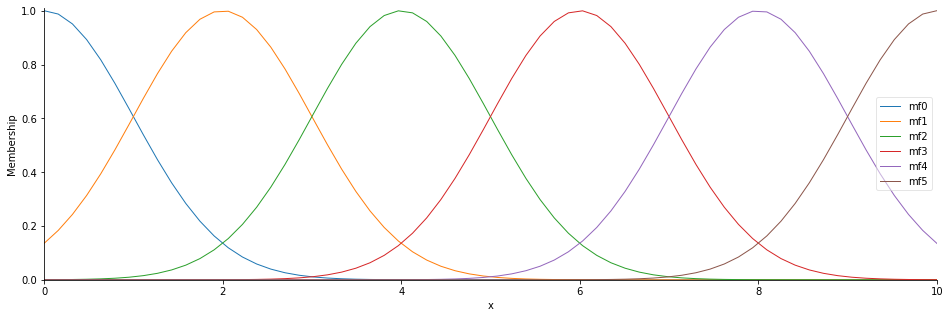

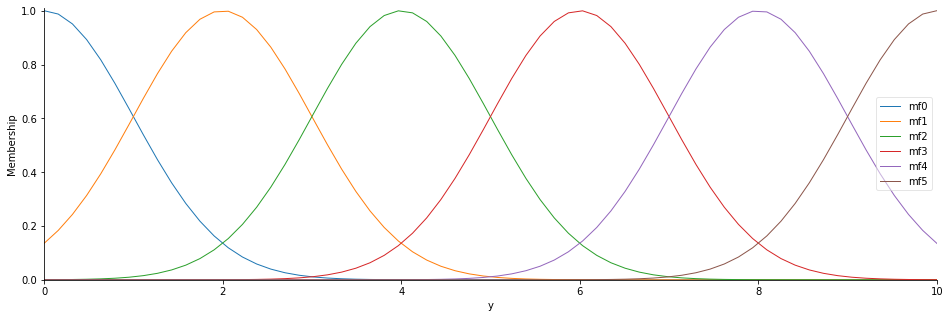

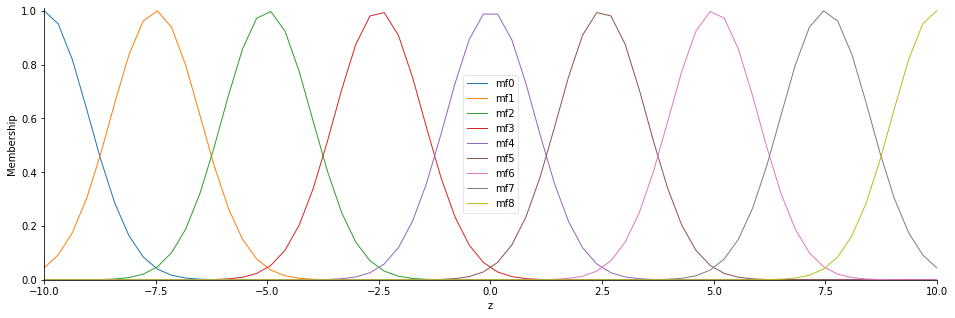

In [46]:
plt.rcParams["figure.figsize"] = (16, 5)
x.view()
y.view()
z.view()

### Rule generation

In [47]:
rules = []
for ix, cx in enumerate(centers_x):
 for iy, cy in enumerate(centers_y):
    zs = []
    for i in range(9):
        zs.append(fuzz.interp_membership(z.universe, z["mf" + str(i)].mf, func(cx, cy)))
    zmf = "mf" + str(max(range(len(zs)), key=zs.__getitem__))
    rules.append(control.Rule(x["mf" + str(ix)] & y["mf" + str(iy)], z[zmf]))

In [48]:
print("Total number of rules:", len(rules), "\n\n", rules)

Total number of rules: 36 

 [IF x[mf0] AND y[mf0] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF x[mf0] AND y[mf1] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF x[mf0] AND y[mf2] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF x[mf0] AND y[mf3] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF x[mf0] AND y[mf4] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF x[mf0] AND y[mf5] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF x[mf1] AND y[mf0] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF x[mf1] AND y[mf1] THEN z[mf5]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF x[mf1] AND y[mf2] THEN z[mf3]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF x[mf1] AND y[mf3] THEN z[mf4]
	AND aggregation function : fmin
	OR 

### Control System

In [49]:
control_system = control.ControlSystemSimulation(control.ControlSystem(rules))

In [50]:
xm, ym = np.meshgrid(u_x, u_y)
z_fuzzy = []
z_real = []
for i in range(len(xm)):
    z_f = []
    z_r = []
    for i2 in range(len(xm[i])):
        control_system.input["x"] = xm[i][i2]
        control_system.input["y"] = ym[i][i2]
        control_system.compute()
        z_f.append(control_system.output["z"])
        z_r.append(func(xm[i][i2], ym[i][i2]))
    z_fuzzy.append(z_f)
    z_real.append(z_r)

z_fuzzy = np.array(z_fuzzy)
z_real = np.array(z_real)

### Mean Absolute Error

In [51]:
print(np.absolute(z_fuzzy - z_real).mean())

1.6132504095662386


### Preview

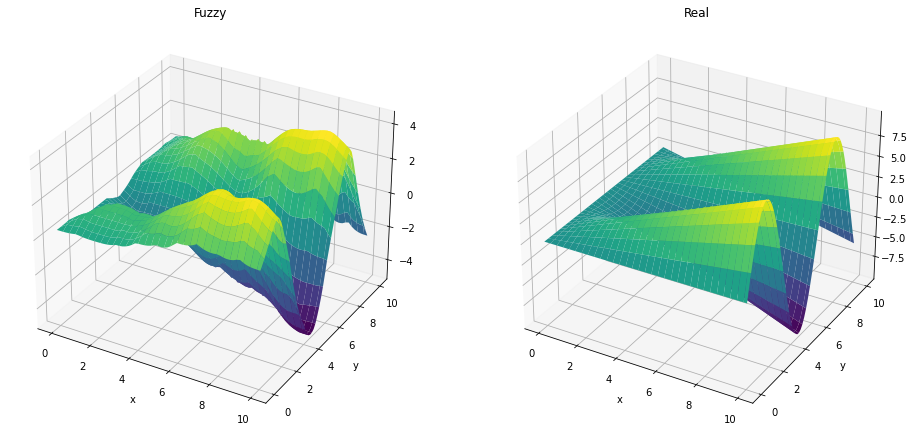

In [52]:
plt.rcParams["figure.figsize"] = (16, 8)

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot_surface(xm, ym, z_fuzzy, cmap="viridis")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fuzzy")

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.plot_surface(xm, ym, z_real, cmap="viridis")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Real")

plt.show()